In [57]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
print('pandas version : ', pd.__version__, '\n')
print('numpy version : ', np.__version__, '\n')
print('missingno version : ', msno.__version__, '\n')
print('matplotlib version : ', matplotlib.__version__, '\n')
print('seaborn version : ', sns.__version__)

pandas version :  1.2.4 

numpy version :  1.19.5 

missingno version :  0.5.0 

matplotlib version :  3.3.4 

seaborn version :  0.11.2


In [59]:
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

# Nettoyage des jeux de données

On va concaténer nos deux jeux de données.

In [60]:
data = pd.concat([data_2016, data_2015], ignore_index = True)

In [61]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

On va supprimer les colonnes qui ne vont pas nous être utile dans nos prédictions de la consommation électrique et les émissions de CO2 des bâtiments de nos jeux de données et les colonnes qui peuvent s'apparenter à de la fuite de données.

In [62]:
data.drop(columns = ['PropertyName', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber',\
                     'CouncilDistrictCode', 'Latitude', 'Longitude', 'ListOfAllPropertyUseTypes',\
                     'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified',\
                     'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',\
                     'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',\
                     'NaturalGas(therms)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier',\
                     'GHGEmissionsIntensity', 'OtherFuelUse(kBtu)', \
                     'GHGEmissionsIntensity(kgCO2e/ft2)', 'City', 'State', 'DefaultData', 'Comments',\
                     'Location', 'Comment', '2010 Census Tracts', 'Zip Codes',\
                     'Seattle Police Department Micro Community Policing Plan Areas',\
                     'City Council Districts', 'SPD Beats'], inplace = True)

In [63]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

On crée une colonne "*AgeOfBuilding*" qui va reprendre l'âge qu'avait le batîment lors du relevé et on supprime la colonne "*YearBuilt*".

In [64]:
data['AgeOfBuilding'] = data['DataYear'] - data['YearBuilt']

data.drop(columns = ['YearBuilt'], inplace = True)

Nous allons nous concentrer sur les batîments non destinés à l'habitation.

In [65]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [66]:
non_residential = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']

In [67]:
data_non_residential = data[data['BuildingType'].isin(non_residential)]

On affine notre tri avec la colonne "*PrimaryPropertyType*".

In [68]:
data_non_residential['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office', 'College/University', 'Self-Storage Facility\n',
       'Residence Hall/Dormitory', 'Non-Refrigerated Warehouse',
       'Distribution Center\n', 'SPS-District K-12',
       'Supermarket/Grocery Store', 'Restaurant\n'], dtype=object)

In [69]:
#On supprime uniquement Low-Rise Multifamily et Residence Hall/Dormitory
non_residential_bis = ['Hotel', 'Other', 'Mixed Use Property', 'K-12 School', 'University',\
                       'Small- and Mid-Sized Office', 'Self-Storage Facility', 'Warehouse',\
                       'Large Office', 'Senior Care Community', 'Medical Office', 'Retail Store',\
                       'Hospital', 'Residence Hall', 'Distribution Center', 'Worship Facility',\
                       'Supermarket / Grocery Store', 'Laboratory', 'Refrigerated Warehouse',\
                       'Restaurant', 'Office', 'College/University', 'Self-Storage Facility\n',\
                       'Non-Refrigerated Warehouse', 'Distribution Center\n', 'SPS-District K-12',\
                       'Supermarket/Grocery Store', 'Restaurant\n']

In [70]:
data_non_residential = data_non_residential[data_non_residential['PrimaryPropertyType'].isin(non_residential_bis)]

In [71]:
#On supprime la colonne "BuildingType" qui fait un tri moins précis des batîments
data_non_residential.drop(columns = ['BuildingType'], inplace = True)

On corrige les quelques erreurs dans nos catégories de bâtiments "*PrimaryPropertyType*".

On en profite pour changer la valeur "*University*" par "*College/University*" pour pouvoir remplir plus facilement les valeurs manquantes.

In [72]:
for row in data_non_residential.index:   
    
    if data_non_residential.loc[row, 'PrimaryPropertyType'] == 'Supermarket / Grocery Store':
        data_non_residential.loc[row, 'PrimaryPropertyType'] = 'Supermarket/Grocery Store'
        
    elif data_non_residential.loc[row, 'PrimaryPropertyType'] == 'Self-Storage Facility\n':
        data_non_residential.loc[row, 'PrimaryPropertyType'] = 'Self-Storage Facility'
        
    elif data_non_residential.loc[row, 'PrimaryPropertyType'] == 'Distribution Center\n':
        data_non_residential.loc[row, 'PrimaryPropertyType'] = 'Distribution Center'      

    elif data_non_residential.loc[row, 'PrimaryPropertyType'] == 'Restaurant\n':
        data_non_residential.loc[row, 'PrimaryPropertyType'] = 'Restaurant'
        
    elif data_non_residential.loc[row, 'PrimaryPropertyType'] == 'University':
        data_non_residential.loc[row, 'PrimaryPropertyType'] = 'College/University'

In [73]:
#On utilise uniquement des minuscules pour ne plus avoir de quartiers doublons
data_non_residential['Neighborhood'] = data_non_residential['Neighborhood'].str.lower()

Regardons ce que nous avons comme valeurs manquantes dans notre jeu de données :

In [74]:
print(data_non_residential.isnull().sum(), '\n')
print(data_non_residential.isnull().mean())
print(data_non_residential.shape)

OSEBuildingID                         0
DataYear                              0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     2
NumberofFloors                        8
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               71
LargestPropertyUseTypeGFA            71
SecondLargestPropertyUseType       1639
SecondLargestPropertyUseTypeGFA    1639
ENERGYSTARScore                    1101
SiteEnergyUse(kBtu)                   9
TotalGHGEmissions                  1635
GHGEmissions(MetricTonsCO2e)       1672
AgeOfBuilding                         0
dtype: int64 

OSEBuildingID                      0.000000
DataYear                           0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
NumberofBuildings                  0.000606
NumberofFloors                     0.002426
P

On va commencer par les colonnes "*NumberofBuildings*" et "*NumberofFloors*".

In [75]:
#On commence par regarder quelles sont les valeurs de nos colonnes "NumberofBuildings" et "NumberofFloors"
print(data_non_residential['NumberofBuildings'].unique(), '\n')
print(data_non_residential['NumberofFloors'].unique())

[  1.   3.   0.   2.   4.  27.   6.  11.  14.   9.   5.  nan   7.   8.
  23.  10. 111.  16.  39.] 

[12. 11. 41. 10. 18.  2.  8. 15. 25.  9. 33.  6. 28.  5. 19.  7.  1.  3.
  4. 24. 20. 34.  0. 16. 23. 17. 36. 22. 47. 29. 14. 49. 37. 42. 63. 13.
 21. 55. 46. 30. 56. 76. 27. 99. 39. nan]


In [76]:
#On remplit les valeurs manquantes par la moyenne des types de propriété
for col in ['NumberofBuildings', 'NumberofFloors']:
    data_non_residential[col].fillna(round(data_non_residential.groupby('PrimaryPropertyType')[col].transform('mean')),\
                                    inplace = True)

Regardons visuellement les valeurs manquantes restantes.

<AxesSubplot:>

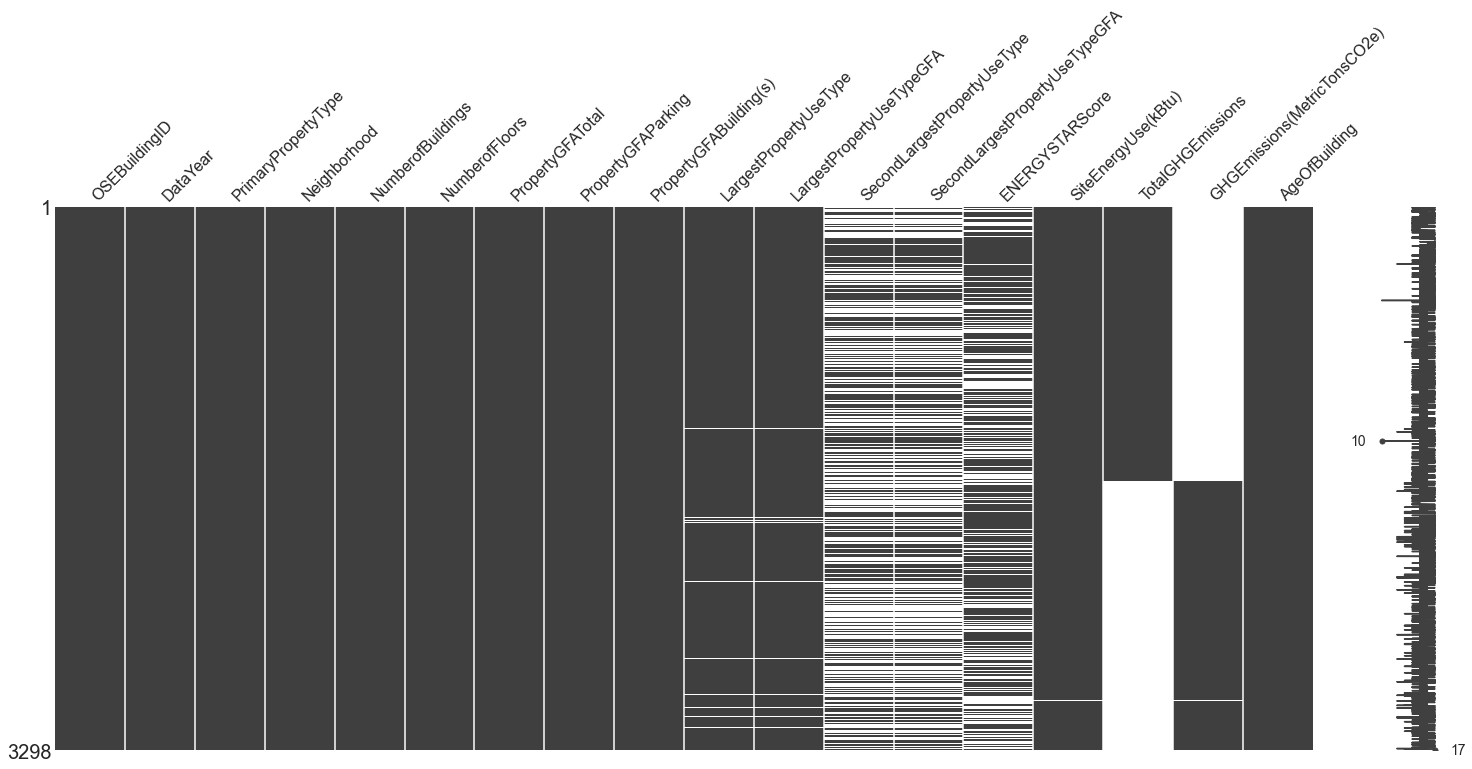

In [77]:
msno.matrix(data_non_residential)

Les émissions de CO2 sont indiquées dans les colonnes "*TotalGHGEmissions*" (pour les données de 2016) et "*GHGEmissions(MetricTonsCO2e)*" (pour les données de 2015). Nous n'allons garder qu'une seule colonne.

In [78]:
data_non_residential['TotalGHGEmissions'].fillna(data_non_residential['GHGEmissions(MetricTonsCO2e)'], inplace = True)    
data_non_residential.drop(columns = ['GHGEmissions(MetricTonsCO2e)'], inplace = True)

Vérifions si nous avons des valeurs aberrantes :

In [79]:
data_non_residential.describe()

,OSEBuildingID,DataYear,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,AgeOfBuilding
count,3298.000000,3298.000000,3298.00000,3298.000000,3.298000e+03,3298.00000,3.298000e+03,3.227000e+03,1659.000000,2197.000000,3.289000e+03,3289.000000,3298.000000
mean,15920.862341,2015.504851,1.11795,4.125227,1.160847e+05,13349.21134,1.027355e+05,9.572568e+04,36256.279263,64.839326,8.104677e+06,177.768036,53.877805
std,13433.990782,0.500052,2.22588,6.575736,2.518104e+05,43713.88364,2.347262e+05,2.280725e+05,68386.748220,28.569414,2.532682e+07,668.386228,32.684648
min,1.000000,2015.000000,0.00000,0.000000,1.128500e+04,-2.00000,-5.055000e+04,5.656000e+03,0.000000,1.000000,0.000000e+00,-0.800000,1.000000
25%,577.250000,2015.000000,1.00000,1.000000,2.962200e+04,0.00000,2.856900e+04,2.555200e+04,5350.000000,47.000000,1.223425e+06,19.720000,27.000000
50%,21119.000000,2016.000000,1.00000,2.000000,4.928950e+04,0.00000,4.756000e+04,4.345200e+04,12208.000000,72.000000,2.517075e+06,49.160000,50.000000
75%,24539.000000,2016.000000,1.00000,4.000000,1.050208e+05,0.00000,9.450000e+04,9.034500e+04,31547.000000,89.000000,6.963616e+06,139.240000,86.000000
max,50226.000000,2016.000000,111.00000,99.000000,9.320156e+06,512608.00000,9.320156e+06,9.320156e+06,686750.000000,100.000000,8.739237e+08,16870.980000,116.000000


On supprime les valeurs négatives et les valeurs nulles pour la consommation électrique et pour les émissions de CO2.

In [80]:
for col in ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'TotalGHGEmissions']:
    data_non_residential.drop(data_non_residential[data_non_residential[col] < 0].index, inplace = True)

for col in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
    data_non_residential.drop(data_non_residential[data_non_residential[col] == 0].index, inplace = True)

In [81]:
#On supprime les avertissements nous indiquant que l'on change les valeurs de notre jeu de données d'origine
pd.options.mode.chained_assignment = None

In [82]:
def remplacement(col, data):
    """
    Prend une colonne d'un dataframe afin de remplir une partie des valeurs manquantes par les valeurs de l'année précédente
    (si la valeur manquante est en 2016) ou par les valeurs de l'année suivante (si la valeur manquante est en 2015). 
    
            Parameters:
                col (object) : colonne que je veux remplir
                data : DataFrame à utiliser
    """
    
    #On ne garde que les lignes où il y a des valeurs manquantes pour la colonne recherchée
    df = data[data[col].isnull()]
    values_to_use = df['OSEBuildingID'].values
    
    #On repart du dataframe d'origine afin d'avoir les ID de 2015 et de 2016 que l'on veut
    df2 = data[data['OSEBuildingID'].isin(values_to_use)]
    
    #On sépare les valeurs de 2015 et de 2016
    data_2016 = df2[df2['DataYear'] == 2016]
    data_2015 = df2[df2['DataYear'] == 2015]
    
    #On ne garde que les valeurs non nulles de chaque sous-DataFrame
    valeurs_2016 = data_2016[~data_2016[col].isnull()]
    valeurs_2015 = data_2015[~data_2015[col].isnull()]
    
    #On a les valeurs par lesquelles nous allons remplacer nos valeurs manquantes
    index_2016 = valeurs_2016['OSEBuildingID'].values
    index_2015 = valeurs_2015['OSEBuildingID'].values
    
    #On crée deux sous-DataFrames pour remplir nos valeurs
    df_2016 = data[data['OSEBuildingID'].isin(index_2016)]
    df_2015 = data[data['OSEBuildingID'].isin(index_2015)]
    
    #On remplace dans nos deux sous-DataFrames
    df_2016[col] = df_2016[col].fillna(method = 'ffill')
    df_2015[col] = df_2015[col].fillna(method = 'bfill')
    
    #On remplace dans notre DataFrame initial
    data[col].fillna(df_2016[col], inplace = True)
    data[col].fillna(df_2015[col], inplace = True)

In [83]:
data_non_residential.isnull().sum()

OSEBuildingID                         0
DataYear                              0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               71
LargestPropertyUseTypeGFA            71
SecondLargestPropertyUseType       1622
SecondLargestPropertyUseTypeGFA    1622
ENERGYSTARScore                    1083
SiteEnergyUse(kBtu)                   9
TotalGHGEmissions                     9
AgeOfBuilding                         0
dtype: int64

In [84]:
for col in data_non_residential.columns:
    remplacement(col, data_non_residential)

In [85]:
data_non_residential.isnull().sum()

OSEBuildingID                         0
DataYear                              0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               18
LargestPropertyUseTypeGFA            18
SecondLargestPropertyUseType       1587
SecondLargestPropertyUseTypeGFA    1587
ENERGYSTARScore                    1040
SiteEnergyUse(kBtu)                   2
TotalGHGEmissions                     2
AgeOfBuilding                         0
dtype: int64

Nous allons essayer de remplir le plus possible notre colonne "*ENERGYSTARScore*".

In [86]:
#Nous n'avons besoin que des types de propriété et de l'Energy Star score pour l'instant
df_type = data_non_residential[['PrimaryPropertyType', 'ENERGYSTARScore']]

In [87]:
#Regardons où nous avons des valeurs manquantes
for cat in df_type['PrimaryPropertyType'].unique():
    print(cat, df_type[df_type['PrimaryPropertyType'] == cat]['ENERGYSTARScore'].isnull().mean())
    print(cat, df_type[df_type['PrimaryPropertyType'] == cat]['ENERGYSTARScore'].isnull().sum(), '\n')

Hotel 0.040268456375838924
Hotel 6 

Other 0.9418837675350702
Other 470 

Mixed Use Property 0.7363636363636363
Mixed Use Property 162 

K-12 School 0.01532567049808429
K-12 School 4 

College/University 1.0
College/University 45 

Small- and Mid-Sized Office 0.15042735042735042
Small- and Mid-Sized Office 88 

Self-Storage Facility 0.9642857142857143
Self-Storage Facility 54 

Warehouse 0.22459893048128343
Warehouse 42 

Large Office 0.043731778425655975
Large Office 15 

Senior Care Community 0.10256410256410256
Senior Care Community 4 

Medical Office 0.04878048780487805
Medical Office 4 

Retail Store 0.1
Retail Store 19 

Hospital 0.0
Hospital 0 

Residence Hall 0.09523809523809523
Residence Hall 2 

Distribution Center 0.22641509433962265
Distribution Center 24 

Worship Facility 0.08391608391608392
Worship Facility 12 

Supermarket/Grocery Store 0.02666666666666667
Supermarket/Grocery Store 2 

Laboratory 0.8181818181818182
Laboratory 9 

Refrigerated Warehouse 0.56
Refrigerated

In [88]:
#On enlève les catégories qui ont beaucoup de valeurs manquantes pour ne pas les imputer directement
no_cat = ['College/University', 'Laboratory', 'Mixed Use Property', 'Other', 'Restaurant', \
                  'Self-Storage Facility', 'University']

for cat in no_cat:
    df_type = df_type[df_type['PrimaryPropertyType'] != cat]

In [89]:
#On impute par la moyenne des catégories restantes
df_type['ENERGYSTARScore'].fillna(round(df_type.groupby('PrimaryPropertyType')['ENERGYSTARScore'].transform('mean')),\
                                    inplace = True)

In [90]:
#On remplace une partie des valeurs manquantes
data_non_residential['ENERGYSTARScore'].fillna(df_type['ENERGYSTARScore'], inplace = True)

print(data_non_residential.isnull().sum())

OSEBuildingID                         0
DataYear                              0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               18
LargestPropertyUseTypeGFA            18
SecondLargestPropertyUseType       1587
SecondLargestPropertyUseTypeGFA    1587
ENERGYSTARScore                     763
SiteEnergyUse(kBtu)                   2
TotalGHGEmissions                     2
AgeOfBuilding                         0
dtype: int64


In [91]:
#On remplace le reste des valeurs manquantes par la moyenne avec un affinage plus fin
data_non_residential['ENERGYSTARScore'].fillna(round(data_non_residential.groupby('LargestPropertyUseType')['ENERGYSTARScore'].transform('mean')),\
                                    inplace = True)

print(data_non_residential.isnull().sum())

OSEBuildingID                         0
DataYear                              0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               18
LargestPropertyUseTypeGFA            18
SecondLargestPropertyUseType       1587
SecondLargestPropertyUseTypeGFA    1587
ENERGYSTARScore                     339
SiteEnergyUse(kBtu)                   2
TotalGHGEmissions                     2
AgeOfBuilding                         0
dtype: int64


In [92]:
#On impute de nouveau par la moyenne des catégories
data_non_residential['ENERGYSTARScore'].fillna(round(data_non_residential.groupby('PrimaryPropertyType')['ENERGYSTARScore'].transform('mean')),\
                                    inplace = True)

print(data_non_residential.isnull().sum())

OSEBuildingID                         0
DataYear                              0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               18
LargestPropertyUseTypeGFA            18
SecondLargestPropertyUseType       1587
SecondLargestPropertyUseTypeGFA    1587
ENERGYSTARScore                       0
SiteEnergyUse(kBtu)                   2
TotalGHGEmissions                     2
AgeOfBuilding                         0
dtype: int64


Nous allons maintenant nous occuper des colonnes concernant les types de propriétés : "*LargestPropertyUseType*", "*LargestPropertyUseTypeGFA*", "*SecondLargestPropertyUseType*" et "*SecondLargestPropertyUseTypeGFA*".

In [93]:
#On remplace les valeurs manquantes de LargestPropertyUseType par un message
data_non_residential['LargestPropertyUseType'].fillna('pas de valeurs', inplace = True)

#On remplace LargestPropertyUseType par PrimaryPropertyType si existant
for row in data_non_residential.index:   
    if data_non_residential.loc[row, 'LargestPropertyUseType'] == 'pas de valeurs':
        data_non_residential.loc[row, 'LargestPropertyUseType'] = data_non_residential.loc[row, 'PrimaryPropertyType']

In [94]:
#On remplace les valeurs manquantes de SecondLargestPropertyUseType par un message
data_non_residential['SecondLargestPropertyUseType'].fillna('pas de valeurs', inplace = True)

#On remplace SecondLargestPropertyUseType par LargestPropertyUseType si existant
for row in data_non_residential.index:   
    if data_non_residential.loc[row, 'SecondLargestPropertyUseType'] == 'pas de valeurs':
        data_non_residential.loc[row, 'SecondLargestPropertyUseType'] = data_non_residential.loc[row, 'LargestPropertyUseType']

In [95]:
#On remplace les valeurs manquantes de LargestPropertyUseTypeGFA par la valeur de la surface total
data_non_residential['LargestPropertyUseTypeGFA'].fillna(0, inplace = True)

for row in data_non_residential.index: 
    if data_non_residential.loc[row, 'LargestPropertyUseTypeGFA'] == 0:
        data_non_residential.loc[row, 'LargestPropertyUseTypeGFA'] = data_non_residential.loc[row, 'PropertyGFATotal']

In [96]:
#On commence par remplacer les valeurs manquantes de SecondLargestPropertyUseTypeGFA par 0
data_non_residential['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace = True)

In [97]:
#On s'assure que certaines surfaces ne sont pas supérieures à la surface total
for row in data_non_residential.index:   
    
    if data_non_residential.loc[row, 'PropertyGFATotal'] < data_non_residential.loc[row, 'LargestPropertyUseTypeGFA']:
        data_non_residential.loc[row, 'LargestPropertyUseTypeGFA'] = data_non_residential.loc[row, 'PropertyGFATotal']
        
    elif data_non_residential.loc[row, 'PropertyGFATotal'] < data_non_residential.loc[row, 'SecondLargestPropertyUseTypeGFA']:
        data_non_residential.loc[row, 'SecondLargestPropertyUseTypeGFA'] = data_non_residential.loc[row, 'PropertyGFATotal']\
        - data_non_residential.loc[row, 'LargestPropertyUseTypeGFA']
        
    elif data_non_residential.loc[row, 'LargestPropertyUseTypeGFA'] < data_non_residential.loc[row, 'SecondLargestPropertyUseTypeGFA']:
        data_non_residential.loc[row, 'SecondLargestPropertyUseTypeGFA'] = data_non_residential.loc[row, 'PropertyGFATotal']\
        - data_non_residential.loc[row, 'LargestPropertyUseTypeGFA']

In [98]:
#On crée des colonnes supplémentaires de pourcentages
data_non_residential['%GFAParking'] = \
round((data_non_residential['PropertyGFAParking'] / data_non_residential['PropertyGFATotal']) * 100, 2)

data_non_residential['%GFABuilding(s)'] = \
round((data_non_residential['PropertyGFABuilding(s)'] / data_non_residential['PropertyGFATotal']) * 100, 2)

data_non_residential['%GFALargest'] = \
round((data_non_residential['LargestPropertyUseTypeGFA'] / data_non_residential['PropertyGFATotal']) * 100, 2)

data_non_residential['%GFASecondLargest'] = \
round((data_non_residential['SecondLargestPropertyUseTypeGFA'] / data_non_residential['PropertyGFATotal']) * 100, 2)

In [99]:
#Vérifions si nous avons encore des valeurs aberrantes
data_non_residential.describe()

,OSEBuildingID,DataYear,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,AgeOfBuilding,%GFAParking,%GFABuilding(s),%GFALargest,%GFASecondLargest
count,3275.000000,3275.000000,3275.000000,3275.000000,3.275000e+03,3275.000000,3.275000e+03,3.275000e+03,3275.000000,3275.000000,3.273000e+03,3273.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,15947.545038,2015.502901,1.118779,4.127328,1.159667e+05,13383.468092,1.025832e+05,9.407954e+04,18306.803755,65.806107,8.145264e+06,178.546104,53.987176,6.178156,93.821844,84.317627,12.226635
std,13394.854201,0.500068,2.233662,6.582912,2.516451e+05,43812.680326,2.343922e+05,2.246943e+05,50615.789954,24.010293,2.538142e+07,669.902342,32.702148,13.880604,13.880604,20.075102,17.035154
min,1.000000,2015.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,1.000000,1.144100e+04,0.080000,1.000000,0.000000,10.500000,18.350000,0.000000
25%,580.000000,2015.000000,1.000000,1.000000,2.950300e+04,0.000000,2.850000e+04,2.520000e+04,0.000000,54.000000,1.242312e+06,19.950000,27.000000,0.000000,100.000000,69.895000,0.000000
50%,21125.000000,2016.000000,1.000000,2.000000,4.924300e+04,0.000000,4.736800e+04,4.195800e+04,0.000000,69.000000,2.553764e+06,49.440000,50.000000,0.000000,100.000000,97.040000,0.000000
75%,24543.000000,2016.000000,1.000000,4.000000,1.049805e+05,0.000000,9.450000e+04,9.000000e+04,12495.000000,82.000000,6.991476e+06,139.340000,86.000000,0.000000,100.000000,100.000000,23.325000
max,50226.000000,2016.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,100.000000,8.739237e+08,16870.980000,116.000000,89.500000,100.000000,100.000000,159.740000


In [100]:
#Regardons combien de valeurs manquantes il reste dans notre jeux de données
data_non_residential.isnull().sum()

OSEBuildingID                      0
DataYear                           0
PrimaryPropertyType                0
Neighborhood                       0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ENERGYSTARScore                    0
SiteEnergyUse(kBtu)                2
TotalGHGEmissions                  2
AgeOfBuilding                      0
%GFAParking                        0
%GFABuilding(s)                    0
%GFALargest                        0
%GFASecondLargest                  0
dtype: int64

<AxesSubplot:>

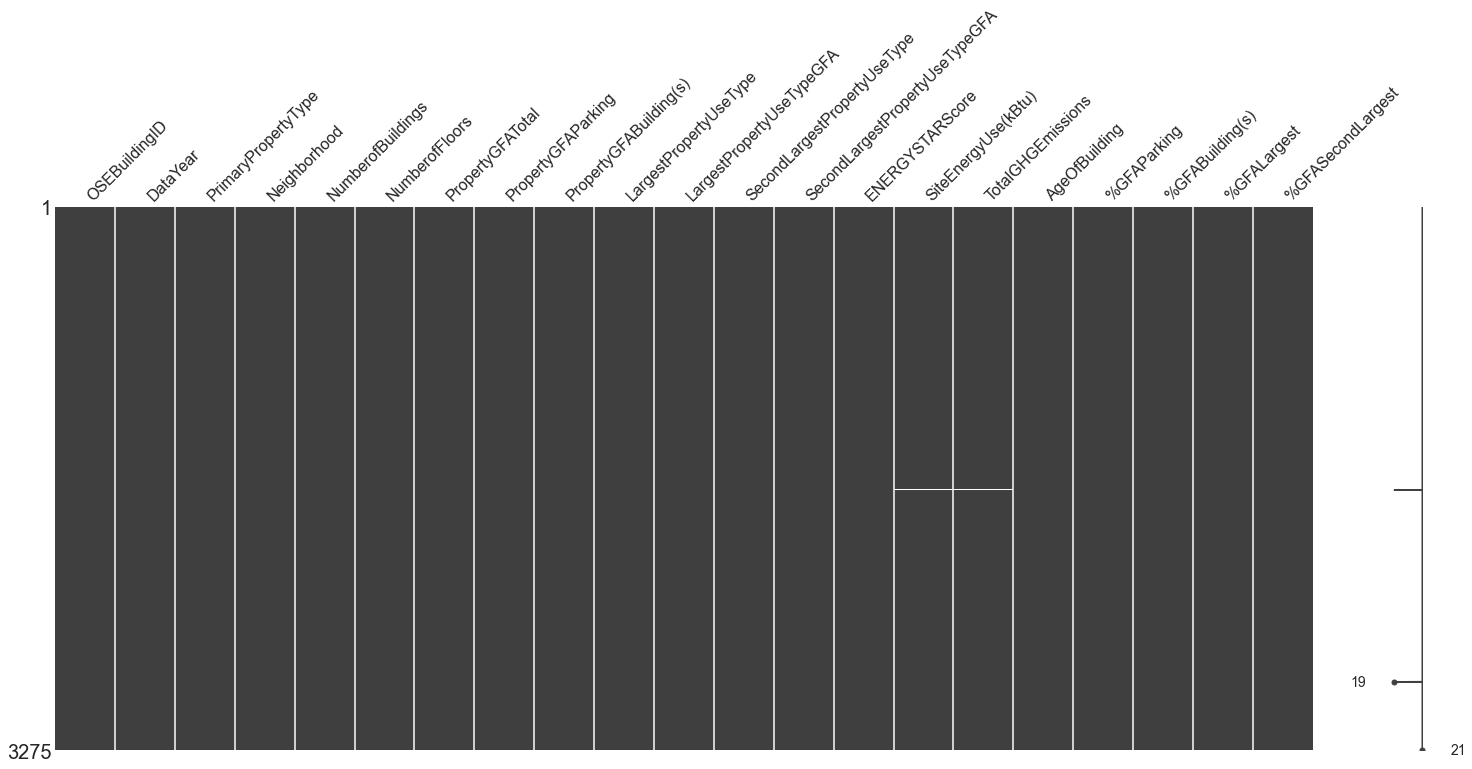

In [101]:
#Visuellement
msno.matrix(data_non_residential)

On supprime les valeurs manquantes de "*SiteEnergyUse(kBtu)*" et "*TotalGHGEmissions*" qui sont, a priori, les mêmes.

In [102]:
data_non_residential.dropna(subset = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], inplace = True)

In [103]:
#On crée une copie de notre DataFrame
df_final = data_non_residential.copy()

On supprimes les dernières colonnes que nous n'allons plus utiliser.

In [104]:
df_final.drop(columns = ['OSEBuildingID', 'DataYear'], inplace = True)

# Analyse univariée de nos variables

In [105]:
def univariee(col, data):
    """
    Prend une variable d'un dataframe et retourne les mesures de tendance centrale (moyenne, médiane, mode),
    les mesures de dispersion (variance, écart-type) et les mesures de forme (skewness empirique et kurtosis
    empirique) de la variable choisie.
    Pour une visualisation graphique, retourne l'histogramme de la variable choisie.
    
            Parameters:
                col (object): variable que l'on souhaite étudier
                data : dataframe à utiliser
    """
    
    #On vérifie que la variable en entrée est bien numérique
    if ((data[col].dtype == float) | (data[col].dtype == np.int64)):
        
        #Mesures de tendances centrales et de dispersion de la variable
        print(col)
        print('moyenne :', round(data[col].mean(), 2))
        print('médiane :', round(data[col].median(), 2))
        print('mode :', data[col].mode())
        print('variance :', round(data[col].var(), 2))
        print('écart-type :', round(data[col].std(), 2))

        #Histrogramme de la distribution de la variable
        sns.set_context('notebook', font_scale = 1.25)
        plt.style.use('seaborn-darkgrid')
        plt.figure(figsize = (8, 8))
        plt.hist(x = data[col].values, bins = 50, align = 'left', color = '#4d7cab', \
             edgecolor = 'black', linewidth = 1.1)
        plt.title('Distribution de la variable : {}'.format(col))
        plt.show()

        #Mesures de forme
        print(col, 'skewness :', data[col].skew(), '\n')
        if data[col].skew() == 0:
            print('La distribution est symmétrique et ')
            print('kurtosis :', data[col].kurtosis(), '\n')
            if data[col].kurtosis() > 0:
                print('les observations sont plus concentrées que la distribution normale.', '\n')
            elif data[col].kurtosis() < 0:
                print('les observations sont moins concentrées que la distribution normale.', '\n')
            else:
                print('la distribution a le même aplatissement que la distribution normale')
        elif data[col].skew() > 0:
            print('La distribution est étalée à droite', '\n')
        else:
            print('La distribution est étalée à gauche', '\n')  
    else:
        print("{} n'est pas une variable quantitatives.".format(col), '\n')

PrimaryPropertyType n'est pas une variable quantitatives. 

None
Neighborhood n'est pas une variable quantitatives. 

None
NumberofBuildings
moyenne : 1.12
médiane : 1.0
mode : 0    1.0
dtype: float64
variance : 4.99
écart-type : 2.23


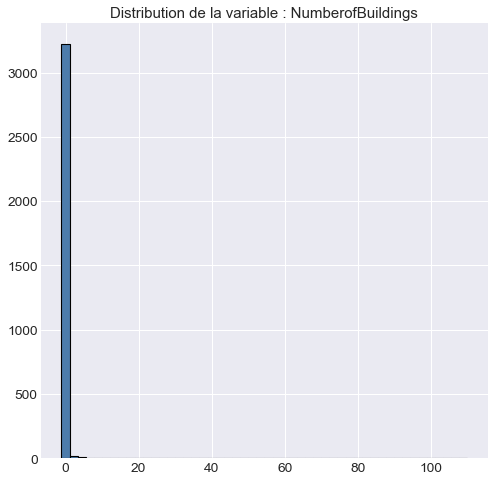

NumberofBuildings skewness : 39.01359081047901 

La distribution est étalée à droite 

None
NumberofFloors
moyenne : 4.13
médiane : 2.0
mode : 0    1.0
dtype: float64
variance : 43.36
écart-type : 6.58


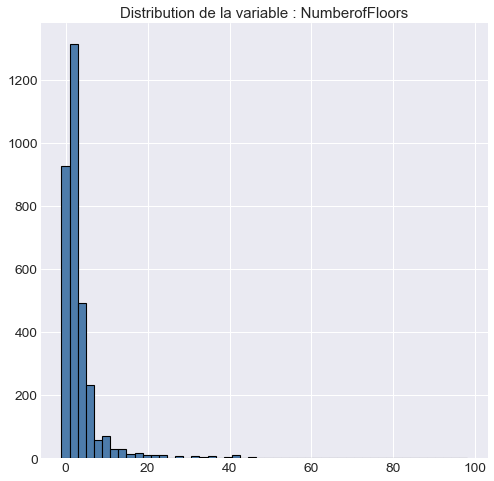

NumberofFloors skewness : 6.0702273065988726 

La distribution est étalée à droite 

None
PropertyGFATotal
moyenne : 115987.38
médiane : 49234.0
mode : 0    21600
1    25920
2    28800
dtype: int64
variance : 63362752986.58
écart-type : 251719.59


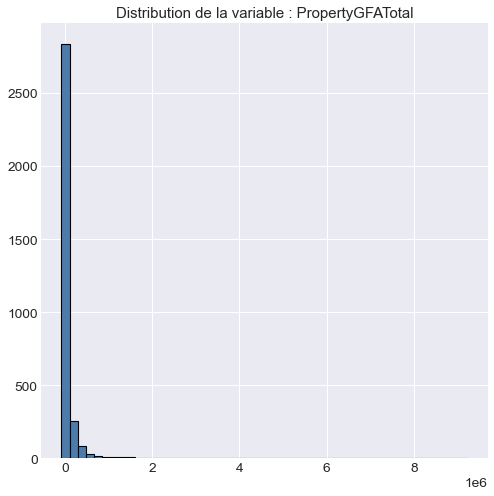

PropertyGFATotal skewness : 17.203838999903915 

La distribution est étalée à droite 

None
PropertyGFAParking
moyenne : 13391.65
médiane : 0.0
mode : 0    0
dtype: int64
variance : 1920614725.27
écart-type : 43824.82


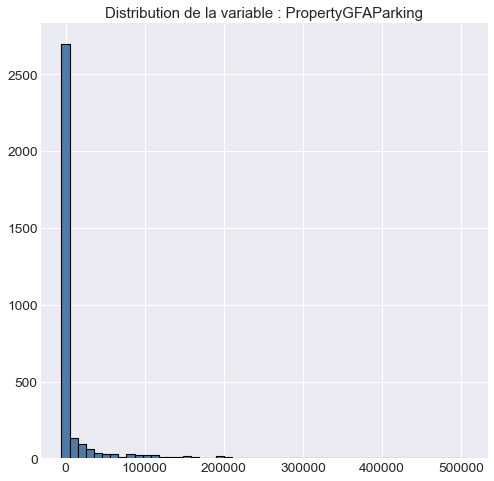

PropertyGFAParking skewness : 5.246911182576144 

La distribution est étalée à droite 

None
PropertyGFABuilding(s)
moyenne : 102595.74
médiane : 47265.0
mode : 0    21600
1    25920
2    28800
dtype: int64
variance : 54972524534.21
écart-type : 234462.2


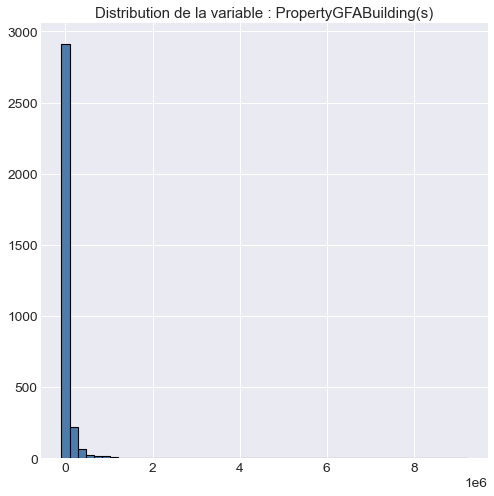

PropertyGFABuilding(s) skewness : 20.637923102433213 

La distribution est étalée à droite 

None
LargestPropertyUseType n'est pas une variable quantitatives. 

None
LargestPropertyUseTypeGFA
moyenne : 94086.87
médiane : 41929.0
mode : 0    21600.0
dtype: float64
variance : 50517811650.84
écart-type : 224761.68


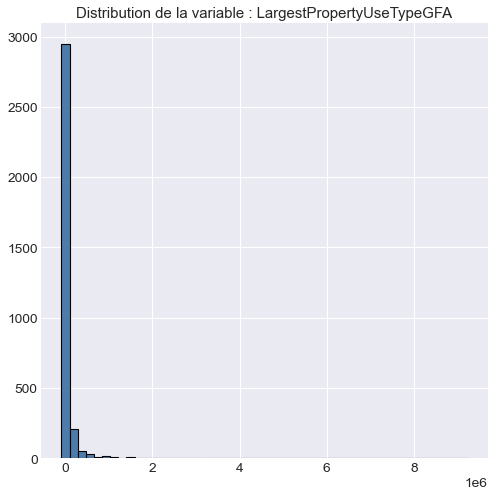

LargestPropertyUseTypeGFA skewness : 22.913490459439846 

La distribution est étalée à droite 

None
SecondLargestPropertyUseType n'est pas une variable quantitatives. 

None
SecondLargestPropertyUseTypeGFA
moyenne : 18317.99
médiane : 0.0
mode : 0    0.0
dtype: float64
variance : 2563319203.9
écart-type : 50629.23


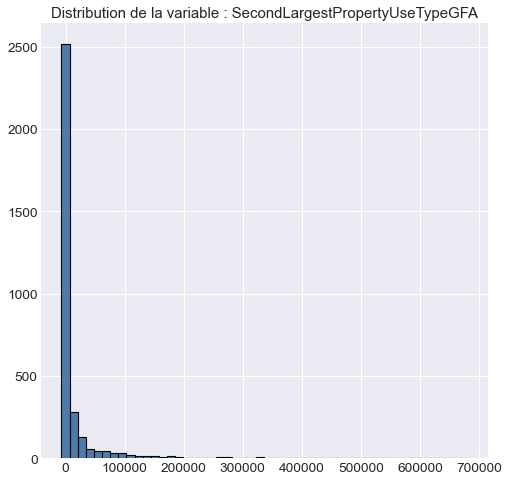

SecondLargestPropertyUseTypeGFA skewness : 5.389084800014171 

La distribution est étalée à droite 

None
ENERGYSTARScore
moyenne : 65.8
médiane : 69.0
mode : 0    69.0
dtype: float64
variance : 576.72
écart-type : 24.02


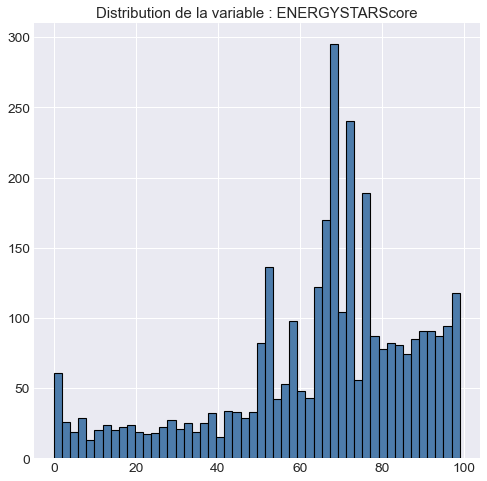

ENERGYSTARScore skewness : -0.95652958135119 

La distribution est étalée à gauche 

None
SiteEnergyUse(kBtu)
moyenne : 8145263.82
médiane : 2553763.5
mode : 0    3717064.0
dtype: float64
variance : 644216239195490.5
écart-type : 25381415.23


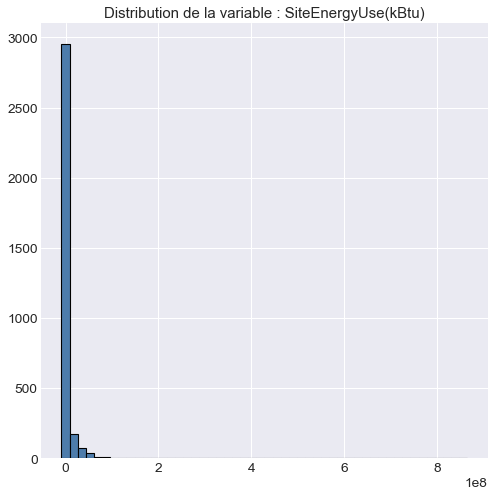

SiteEnergyUse(kBtu) skewness : 17.399385519531695 

La distribution est étalée à droite 

None
TotalGHGEmissions
moyenne : 178.55
médiane : 49.44
mode : 0    97.27
dtype: float64
variance : 448769.15
écart-type : 669.9


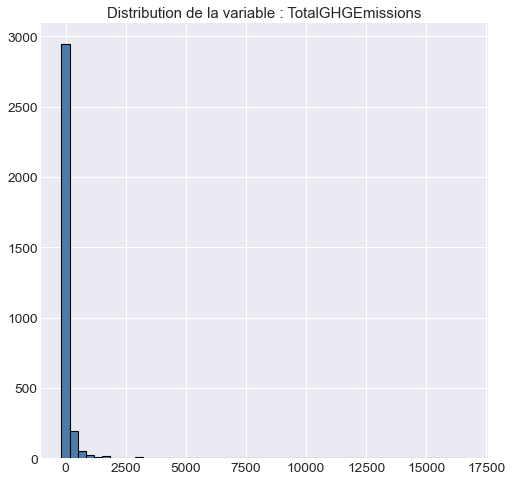

TotalGHGEmissions skewness : 14.095387246548926 

La distribution est étalée à droite 

None
AgeOfBuilding
moyenne : 53.98
médiane : 50.0
mode : 0    16
dtype: int64
variance : 1070.01
écart-type : 32.71


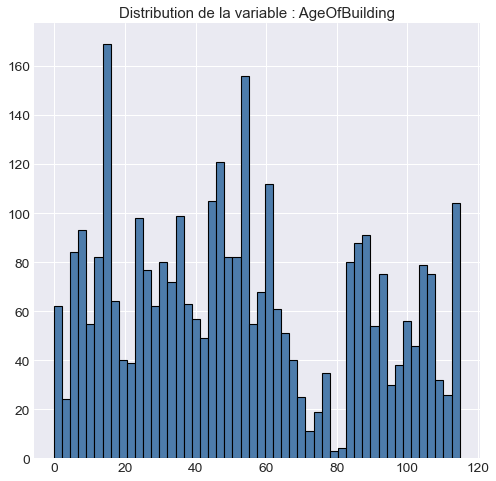

AgeOfBuilding skewness : 0.2880440774422426 

La distribution est étalée à droite 

None
%GFAParking
moyenne : 6.18
médiane : 0.0
mode : 0    0.0
dtype: float64
variance : 192.77
écart-type : 13.88


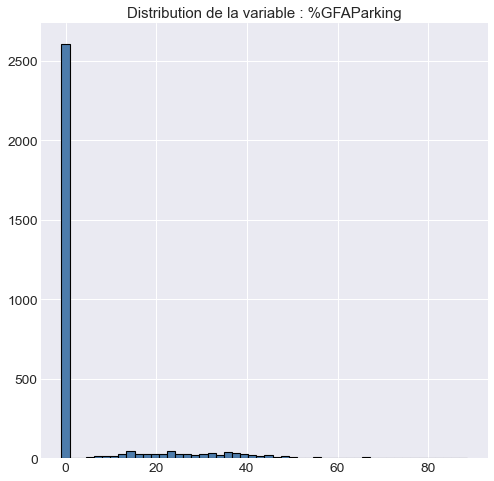

%GFAParking skewness : 2.3752193461060513 

La distribution est étalée à droite 

None
%GFABuilding(s)
moyenne : 93.82
médiane : 100.0
mode : 0    100.0
dtype: float64
variance : 192.77
écart-type : 13.88


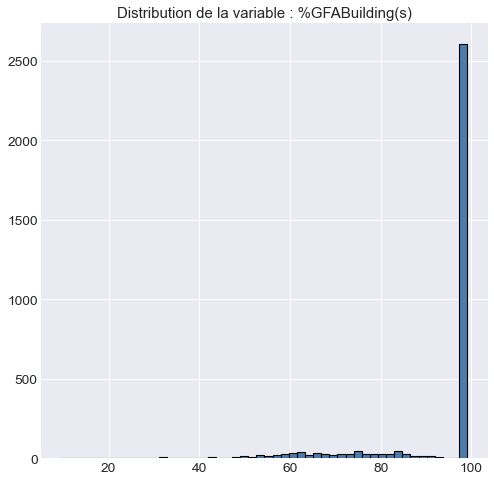

%GFABuilding(s) skewness : -2.375219346106055 

La distribution est étalée à gauche 

None
%GFALargest
moyenne : 84.31
médiane : 97.04
mode : 0    100.0
dtype: float64
variance : 403.11
écart-type : 20.08


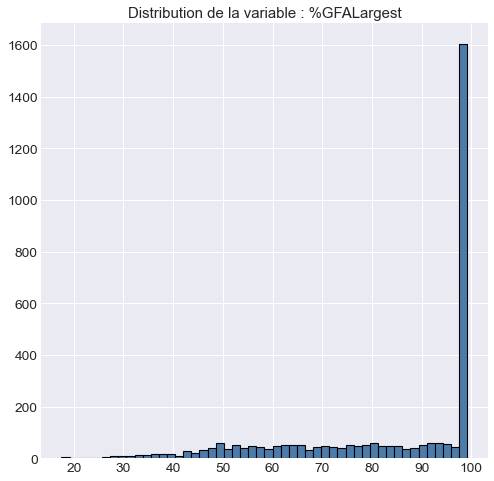

%GFALargest skewness : -1.0224852096310353 

La distribution est étalée à gauche 

None
%GFASecondLargest
moyenne : 12.23
médiane : 0.0
mode : 0    0.0
dtype: float64
variance : 290.28
écart-type : 17.04


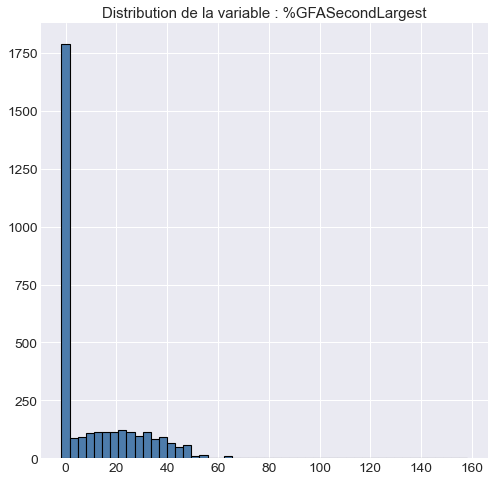

%GFASecondLargest skewness : 1.6510610724288683 

La distribution est étalée à droite 

None


In [106]:
for col in df_final.columns:
    print(univariee(col, df_final))

On peut regarder les corrélations entre nos différentes variables.

In [107]:
df_corr = df_final.copy()

df_corr.corr()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,AgeOfBuilding,%GFAParking,%GFABuilding(s),%GFALargest,%GFASecondLargest
NumberofBuildings,1.000000,-0.019593,0.634313,0.000815,0.680849,0.702319,0.043403,-0.008818,0.603548,0.348843,0.019183,-0.013799,0.013799,0.029645,-0.016712
NumberofFloors,-0.019593,1.000000,0.487639,0.498967,0.430266,0.420925,0.483800,0.101408,0.271847,0.152970,-0.095846,0.202235,-0.202235,-0.079556,0.095057
PropertyGFATotal,0.634313,0.487639,1.000000,0.467334,0.986252,0.975365,0.580422,0.071974,0.771040,0.521030,-0.142124,0.178066,-0.178066,-0.073225,0.096281
PropertyGFAParking,0.000815,0.498967,0.467334,1.000000,0.314815,0.364268,0.504475,0.076801,0.205084,0.094025,-0.282812,0.666865,-0.666865,-0.228853,0.173689
PropertyGFABuilding(s),0.680849,0.430266,0.986252,0.314815,1.000000,0.979068,0.528849,0.062916,0.789458,0.541805,-0.099723,0.066524,-0.066524,-0.035838,0.070902
LargestPropertyUseTypeGFA,0.702319,0.420925,0.975365,0.364268,0.979068,1.000000,0.466116,0.059716,0.797995,0.550628,-0.110011,0.110933,-0.110933,0.034028,0.038440
SecondLargestPropertyUseTypeGFA,0.043403,0.483800,0.580422,0.504475,0.528849,0.466116,1.000000,0.082066,0.456268,0.419655,-0.198247,0.256494,-0.256494,-0.242200,0.481011
ENERGYSTARScore,-0.008818,0.101408,0.071974,0.076801,0.062916,0.059716,0.082066,1.000000,-0.053301,-0.089183,0.044144,-0.006264,0.006264,0.028981,0.012441
SiteEnergyUse(kBtu),0.603548,0.271847,0.771040,0.205084,0.789458,0.797995,0.456268,-0.053301,1.000000,0.865494,-0.097043,0.079605,-0.079605,-0.011562,0.111729
TotalGHGEmissions,0.348843,0.152970,0.521030,0.094025,0.541805,0.550628,0.419655,-0.089183,0.865494,1.000000,-0.066829,0.020565,-0.020565,0.036302,0.097285


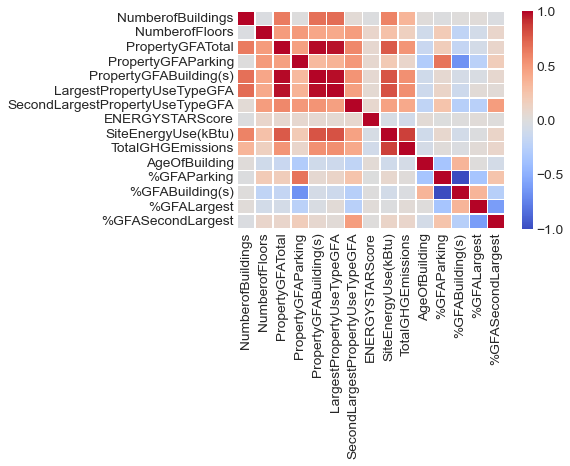

In [108]:
#Graphiquement avec une heatmap :
h = sns.heatmap(df_corr.corr(), linewidth = 0.5, cmap = "coolwarm", xticklabels = True, yticklabels = True)

# Jeux de données finaux pour nos prédictions

Nous allons créer deux copies de notre jeu de données *df_final*. Le premier sera utilisé pour prédire les consommations électriques de bâtiments, le second pour prédire les émissions de CO2 des bâtiments.

Les colonnes que nous voulons prédire "*SiteEnergyUse(kBtu)*" et "*TotalGHGEmissions*" sont très concentrées sur des valeurs élevées, nous allons les passer au log pour avoir de meilleurs prédictions.

In [109]:
for col in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
    df_final[col] = np.log(df_final[col] + 1)

In [110]:
#On crée le jeu de données que l'on va utiliser pour prédire les consommations d'électricité
df_elec = df_final.copy()
df_elec = df_elec.drop(columns = ['TotalGHGEmissions'])

In [111]:
#On crée le jeu de données que l'on va utiliser pour prédire les émissions de CO2
df_co2 = df_final.copy()
df_co2 = df_co2.drop(columns = ['SiteEnergyUse(kBtu)'])

In [112]:
#On sauvegarde nos jeux de données au format .csv
df_elec_csv = df_elec.to_csv('P4_elec.csv')
df_co2_csv = df_co2.to_csv('P4_co2.csv')